<a href="https://colab.research.google.com/github/sajedefadaei/Pytorch-Tutorial/blob/main/Simple_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn
import torch.nn.functional as F

In [3]:
class Model(nn.Module):
    def __init__(self, in_feature, h1, h2, out_feature):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(in_feature, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_feature)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


In [4]:
torch.manual_seed(42)
model = Model(in_feature=4, h1=8, h2=9, out_feature=3)

# Load data and trainig

## Load data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
df.loc[df["species"]=="setosa", "species"] = 0.0
df.loc[df["species"]=="versicolor", "species"] = 1.0
df.loc[df["species"]=="virginica", "species"] = 2.0
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## Training

In [31]:
#spliting data
from sklearn.model_selection import train_test_split
X = df.drop("species", axis=1).values
y = df["species"].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train.astype(int))

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [36]:
epochs = 100
losses = list()
for i in range(epochs):
    y_predict = model(x_train)
    loss = criterion(y_predict, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.detach().numpy())
    if i%10==0 :
        print(f"Epoch: {i} Loss: {loss}")

Epoch: 0 Loss: 1.0441566705703735
Epoch: 10 Loss: 0.902738630771637
Epoch: 20 Loss: 0.7483676671981812
Epoch: 30 Loss: 0.6136639714241028
Epoch: 40 Loss: 0.4480833113193512
Epoch: 50 Loss: 0.27264317870140076
Epoch: 60 Loss: 0.1589346081018448
Epoch: 70 Loss: 0.1022333949804306
Epoch: 80 Loss: 0.07869420200586319
Epoch: 90 Loss: 0.06879036128520966


Text(0.5, 0, 'Epoch')

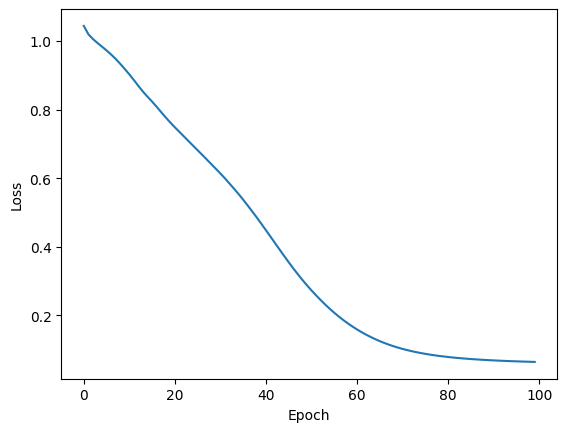

In [37]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")

## Test

In [40]:
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test.astype(int))

In [41]:
with torch.no_grad():
    y_eval = model(x_test)
    loss = criterion(y_eval, y_test)
    print(loss)

tensor(0.0630)


In [44]:
y_eval

tensor([[ -1.4066,   6.3531,   2.6033],
        [  8.4612,   2.4785,  -7.6001],
        [-12.2571,   1.1658,  13.8222],
        [ -1.6742,   5.9624,   2.8619],
        [ -1.5850,   6.7968,   2.8335],
        [  7.8991,   2.3492,  -7.0569],
        [  1.1412,   6.1074,  -0.0657],
        [ -5.2318,   4.4638,   6.5618],
        [ -3.2702,   4.9376,   4.4913],
        [  0.5799,   6.5950,   0.5303],
        [ -4.3650,   4.7991,   5.6559],
        [  7.4141,   2.0736,  -6.6026],
        [  8.1959,   2.3759,  -7.3473],
        [  7.5455,   2.1244,  -6.7278],
        [  7.9198,   2.2692,  -7.0844],
        [ -1.3286,   6.5722,   2.5412],
        [ -8.3095,   2.4230,   9.6919],
        [  0.3477,   6.5204,   0.7528],
        [ -1.5882,   5.8033,   2.7544],
        [ -8.2278,   2.2713,   9.5928],
        [  7.2938,   2.0997,  -6.4817],
        [ -3.9299,   4.6837,   5.1782],
        [  7.3971,   2.3003,  -6.5661],
        [ -7.8439,   2.5463,   9.2025],
        [ -5.7326,   5.7024,   7.1925],


In [45]:
count = 0
for i , label in enumerate(y_test):
    print(f"Prediction: {torch.argmax(y_eval[i])} Label: {label}")
    if torch.argmax(y_eval[i]) == label:
        count+=1
print(f"Accuracy: {count/len(y_test)}")

Prediction: 1 Label: 1
Prediction: 0 Label: 0
Prediction: 2 Label: 2
Prediction: 1 Label: 1
Prediction: 1 Label: 1
Prediction: 0 Label: 0
Prediction: 1 Label: 1
Prediction: 2 Label: 2
Prediction: 1 Label: 1
Prediction: 1 Label: 1
Prediction: 2 Label: 2
Prediction: 0 Label: 0
Prediction: 0 Label: 0
Prediction: 0 Label: 0
Prediction: 0 Label: 0
Prediction: 1 Label: 1
Prediction: 2 Label: 2
Prediction: 1 Label: 1
Prediction: 1 Label: 1
Prediction: 2 Label: 2
Prediction: 0 Label: 0
Prediction: 2 Label: 2
Prediction: 0 Label: 0
Prediction: 2 Label: 2
Prediction: 2 Label: 2
Prediction: 2 Label: 2
Prediction: 2 Label: 2
Prediction: 2 Label: 2
Prediction: 0 Label: 0
Prediction: 0 Label: 0
Accuracy: 1.0
